# Chapter 3: Data Visualization

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

Pandas provides a number of basic plotting capabilities. Matplotlib however gives you more control over details of the visualisation. The Pandas plot methods return an axes object, which can also be used to modify the visualisation using basic matplotlib commands.

## Import required packages

In [15]:
%matplotlib inline
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
import matplotlib.pylab as plt

## Table 3.2
The BostonHousing dataset has data from 1970s Boston that documents the median home value BY NEIGHBORHOOD. There are 506 neighborhoods in Boston, and data was collected on each regarding crime, industry, distance to city center, ease of commute, tax rates, school quality, etc. Students should learn to examine the data dictionary and study the measures for every predictor and the response. It's easy to confuse this dataset with house-level data!

In [51]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_df = pd.read_csv('/Users/aminazimi/Downloads/housing (1).csv', header=None, delimiter=r"\s+", names=column_names)
print(housing_df.head(5))

# rename CAT. MEDV column to correct an error in the naming and adopt a convention of underscore between variable words
housing_df['CAT_MEDV'] = np.where(housing_df['MEDV']>30.0, '1', '0')


# The print command generates a 'typewriter' output
print(housing_df.head(9))

# the head command formats the output into a pandas dataframe (much easier to read)
housing_df.head(9)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622   

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5,0


The pandas describe function provides basic statistical information about each variable in a dataframe. This display can be used to determine missing values (count), binary variables (max = 1, min = 0), mean and median (which can determine if the variable could have a normal or gaussian distribution; equality between mean and median can indicate Gaussian distribution)

In [17]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


####  Renaming CAT_MEDV again, and plotting the ratio of low-income housing against median value. The students should examine this scatter plot for relationship linearity between predictor and response as well as any potential outliers or influence points.

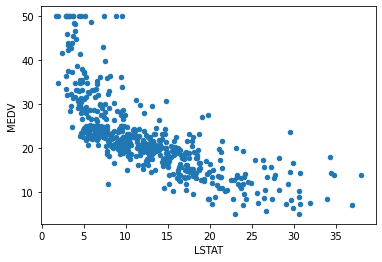

In [28]:
# rename CAT. MEDV column for easier data handling
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)
plt.show()

##### The same scatter plot but with color lines and filled circles; students should examine the Python color chart so that they can use color names instead of codes (i.e., springgreen instead of C2). The facecolor = 'none' removes the color fill and draws an open circle.

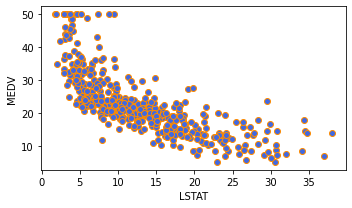

In [29]:
# Set the color of the points in the scatterplot and draw as open circles.
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(housing_df.LSTAT, housing_df.MEDV, color='darkorange', facecolor='royalblue')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.tight_layout()
plt.show()

The bar chart uses the pandas groupby function, which allows comparisons between binary variables (and other categorical). The addition of 'mean' computes the average median neighborhood home value and then compares then to neighborhoods on and off the Charles River. This plot indicates that neighborhood on the river have higher values (but it is not a statistical measure, only a visible one).

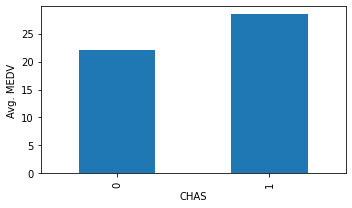

In [30]:
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Avg. MEDV')

plt.tight_layout()
plt.show()

##### The next plot repeats the information from above, but with different colors for the bars.

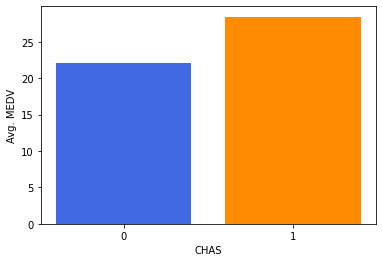

In [31]:
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['royalblue', 'darkorange'])
ax.set_xticks([0, 1])
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')
plt.show()

#### Here the function groupby is used to compare the mean of every variable against the Charles River attribute. Significant differences in the mean values within a single variable shows the difference of being on or off the river. For example, neighborhoods on the river have lower crime rates than those off the river. And even though they have a higher average age, they have higher average median values (yes, we are taking the average of a group of medians!)

In [32]:
housing_df.groupby('CHAS').mean()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CHAS,,,,,,,,,,,,,
0,3.744447,11.634820,11.019193,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,355.461040,12.757941,22.093843
1,1.851670,7.714286,12.719143,0.593426,6.519600,77.500000,3.029709,9.314286,386.257143,17.491429,372.997429,11.241714,28.440000


##### This plot references the dataForPlot from the above pandas example and plots it in matplotlib so that we and add color by bar. Note that the pandas plot has different values than the matplotlib, so we will look inside the plotting data and see the raw numbers.

Text(0, 0.5, '% of CAT_MEDV')

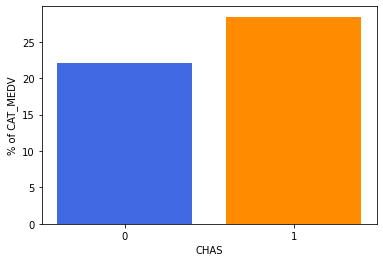

In [37]:
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['royalblue', 'darkorange'])
ax.set_xticks([0, 1])
ax.set_xlabel('CHAS')
ax.set_ylabel('% of CAT_MEDV')

##### These displays look inside the matplotlib data for plotting. The .index is the binary CHAS variable with two values and the dataForPlot are the mean values of the CAT_MEDV percentages. It appears that the pandas plot function did not properly plot this data! USE MATPLOTLIB!

In [38]:
print(dataForPlot.index)

Int64Index([0, 1], dtype='int64', name='CHAS')


In [39]:
print(dataForPlot)

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64


## Figure 3.2
Histogram of MEDV. This is the first distribution plot, which can check the distribution of any variable. Normality is not required of any variable in regression or classification, but it can improve accuracy as shown through Bayes Theorem. The first plot is a pandas plot and the second is matplotlib.

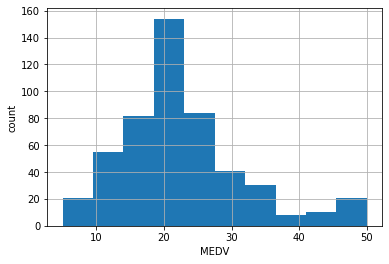

In [40]:
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV')
ax.set_ylabel('count')

plt.show()

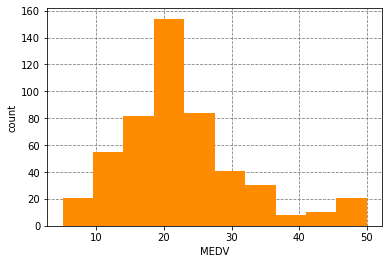

In [42]:
fig, ax = plt.subplots()
ax.hist(housing_df.MEDV, color='darkorange')
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--') # dashed grey grid lines instead of solid
ax.set_xlabel('MEDV')
ax.set_ylabel('count')
plt.show()

##### Using the seaborn package, we can plot the histogram and the density estimator in the same plotting window.

/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'MEDV'), Text(0, 0.5, 'count')]

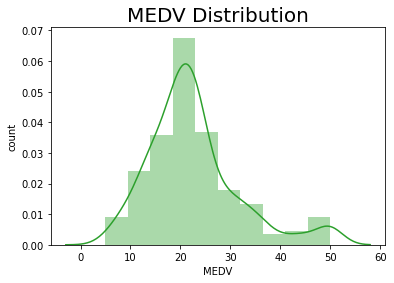

In [43]:
f, ax = plt.subplots(1,1)

sns.distplot(housing_df.MEDV, bins=10, label='MEDV', color='C2')

ax.set_title('MEDV Distribution', fontsize=20)
ax.set(xlabel='MEDV', ylabel='count')

#### Any data point beyond the whiskers (1.5* IQR) may be considered as a possible outlier. The only outliers in this chart are for higher-MEDV neighborhoods not on the Charles River - discuss why this is the case.

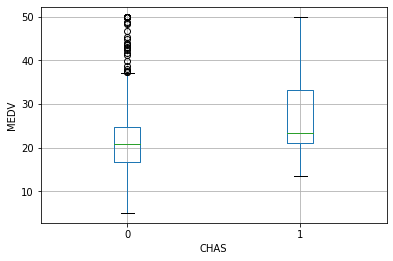

In [44]:
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.suptitle('')  # Suppress the titles
plt.title('')

plt.show()

##### Same plot, but using matplotlib instead of pandas. Grid lines are removed, median is display as a red line.

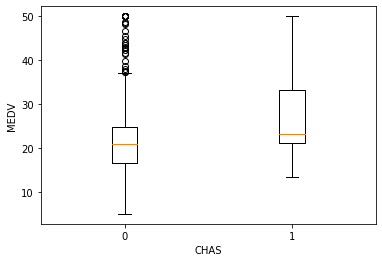

In [53]:
dataForPlot = [list(housing_df[housing_df.CHAS==0].MEDV), list(housing_df[housing_df.CHAS==1].MEDV)]
fig, ax = plt.subplots()
ax.boxplot(dataForPlot)
ax.set_xticks([1, 2])
ax.set_xticklabels([0, 1])
ax.set_xlabel('CHAS')
ax.set_ylabel('MEDV')
plt.show()

## Figure 3.3
Side by side boxplots. This display has limitations because it puts all boxplots into the same window, which compresses the width of each boxplot. You may wish to generate multiple independent boxplots, each with its own window, to have better visibility.

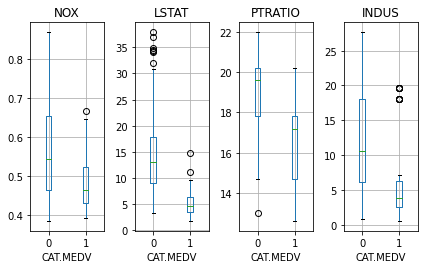

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column='NOX', by='CAT_MEDV', ax=axes[0])
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=axes[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax=axes[3])
for ax in axes:
    ax.set_xlabel('CAT.MEDV')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

## Figure 3.4

Using a standard heatmap to view correlations is limited - the default color ranges goes from light (positive correlations) to dark (negative correlations) which makes interpretation very difficult. Overlaying correlation coefficients makes this a better chart, but bi-color projections with correlation coefficients overlay are best.

<AxesSubplot:>

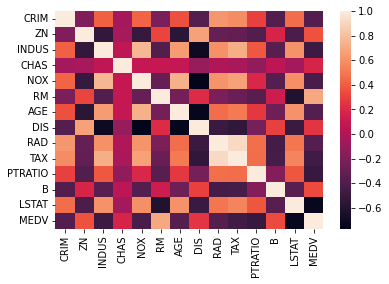

In [47]:
corr = housing_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

##### This is the bi-color chart but without correlation coefficients.

<AxesSubplot:>

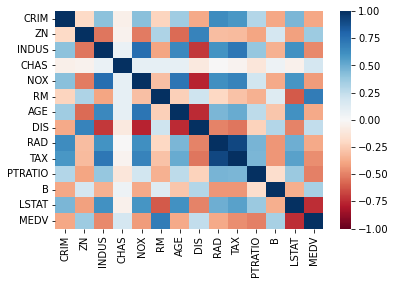

In [48]:
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

##### This is the best version for interpretation, having both bi-color range and numerical values.

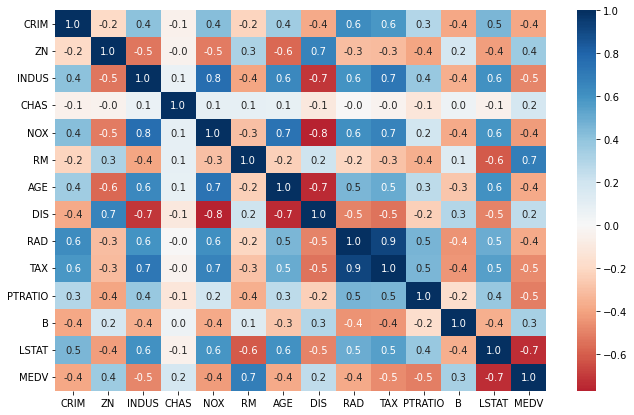

In [49]:
# Include information about values
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

## Figure 3.6

#### The following scatter plots show how to add a third dimension to a pair-wise scatter plot using color. LSAT is the X axis, NOX is the Y axis, and the colors blue and orange represent neighborhoods with median values above \$30K and below, respectively.

<AxesSubplot:xlabel='LSTAT', ylabel='NOX'>

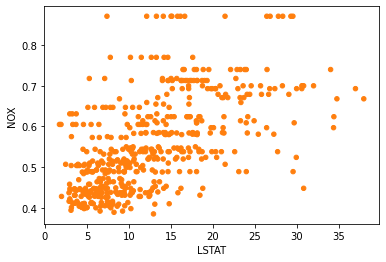

In [54]:
# Color the points by the value of CAT.MEDV
housing_df.plot.scatter(x='LSTAT', y='NOX', c=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])

<AxesSubplot:xlabel='LSTAT', ylabel='NOX'>

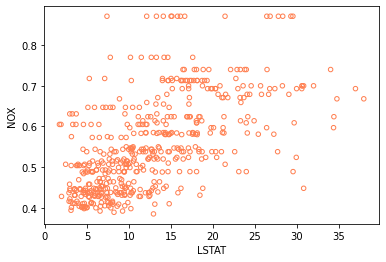

In [55]:
# Change the rendering of the points to open circles by controlling the color
housing_df.plot.scatter(x='LSTAT', y='NOX', color='none',
                        edgecolor=['dodgerblue' if c == 1 else 'coral' for c in housing_df.CAT_MEDV])

## Panel plots

Compute mean MEDV per RAD and CHAS and create two bar charts for each value of RAD. There are nine possible values for RAD, which indicates the accessibility to radial highways (easier access = easier commute to the city center).

Some neighborhoods on the Charles River don't have the same access to radial highways - why is this?

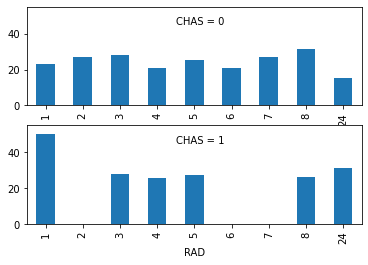

In [57]:
dataForPlot_df = housing_df.groupby(['CHAS','RAD']).mean()['MEDV']

# We determine all possible RAD values to use as ticks
ticks = set(housing_df.RAD)

for i in range(2):
    for t in ticks.difference(dataForPlot_df[i].index):
        dataForPlot_df.loc[(i, t)] = 0

# reorder to rows, so that the index is sorted
dataForPlot_df = dataForPlot_df[sorted(dataForPlot_df.index)]

# Determine a common range for the y axis
yRange = [0, max(dataForPlot_df) * 1.1] 

fig, axes = plt.subplots(nrows=2, ncols=1)
dataForPlot_df[0].plot.bar(x='RAD', ax=axes[0], ylim=yRange)
dataForPlot_df[1].plot.bar(x='RAD', ax=axes[1], ylim=yRange)
axes[0].annotate('CHAS = 0', xy=(3.5, 45))
axes[1].annotate('CHAS = 1', xy=(3.5, 45))

plt.show()

## Figure 3.7
Scatterplot matrix. The diagonal paramter has two choices, 'hist' and 'kde'; 'hist' generate a histogram of the variable on the left whereas 'kde' makes a kernel density estimator, or smooth plot of a histogram. Try both of these.

Look at the pairwise relationships - is there a linear or nonlinear relationship between those pairs? Think about why the relationship may be linear and why not.

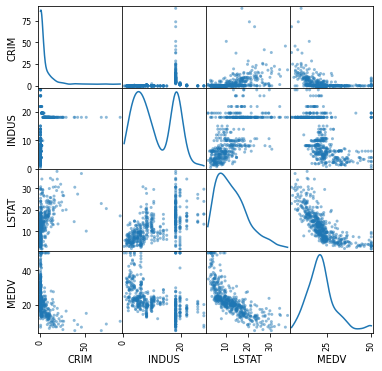

In [58]:
_ = scatter_matrix(housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']], figsize=(6, 6), diagonal='kde')

##### The next plot adds correlation coefficients. A rule of thumb is to eliminate any predictors that are more than 70% correlated, but this does not take into account spurious correlations or predictors that are correlated but all must remain in the model (eg., number of bedroom and square footage of a house). It's better to use multivariate measures of multicollinearity, such as Cook's or Mahalanobis distances or Variance Inflation Factor (>10 indicates multicollinearity that must be addressed).

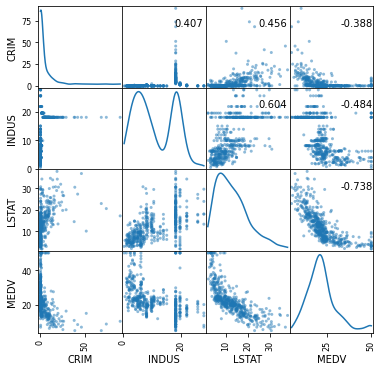

In [59]:
# Add the correlation coefficient to the scatterplots above the diagonal
df = housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']]
axes = scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal='kde')
corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

## Figure 3.8
#### The first plot shows a normal scatterplot. The second plot transforms both the X and Y axes to log scale, which can 'spread out' the data points and show patterns that would otherwise be compressed.

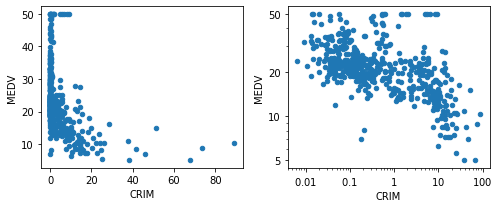

In [60]:
# Avoid the use of scientific notation for the log axis
plt.rcParams['axes.formatter.min_exponent'] = 4

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Regular scale
housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])

# log scale
ax = housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, ax=axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.tight_layout()

plt.show()

#### The first plot shows a normal boxplot. The second plot transforms the Y axis to log scale, which can 'spread out' the data points and show patterns that would otherwise be compressed.

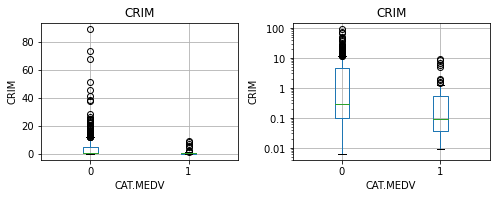

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# regular scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[0])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('CRIM')

# log scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[1])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('CRIM')
ax.set_yscale('log')

# suppress the title
axes[0].get_figure().suptitle('')
plt.tight_layout()

plt.show()

## Figure 3.12

#### Parallel coordinate plot of the BostonHousing dataset. First, all variable values are normalized to the same scale using MinMaxScaler. Then two parallel coordinate plots are generated, one for CAT_MEDV = 0 and one for CAT_MEDV = 1.

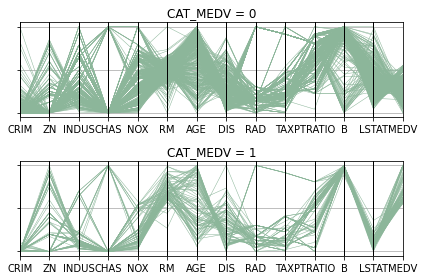

In [63]:
min_max_scaler = preprocessing.MinMaxScaler() # use the default range of (0,1)

dataToPlot = pd.DataFrame(min_max_scaler.fit_transform(housing_df), 
                         columns = housing_df.columns)

fig, axes = plt.subplots(nrows = 2, ncols = 1)
for i in (0,1):
    parallel_coordinates(dataToPlot.loc[dataToPlot.CAT_MEDV == i], 
                        'CAT_MEDV', ax=axes[i], linewidth=0.5)
    axes[i].set_title('CAT_MEDV = {}'.format(i))
    axes[i].set_yticklabels([])
    axes[i].legend().set_visible(False)

plt.tight_layout()